<a href="https://colab.research.google.com/github/ke-wen/ke-wen/blob/main/Forecastingnonseasonal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Proposal Brief      

Grace, Jack and I have decided to choose Household total disposable Income as our non-seasonal data. The reason we chose to do our nonseasonal data on total disposable income is because Covid-19 had such a dramatic effect on people's financial situation. Due to the pandemic, many people lost their jobs or had their income reduced, which resulted in having a big impact on the disposable income for each household. And the factors that affect the total disposable income are usually non-seasonal, so we have taken the total disposable income as our non-seasonal time series forecasting target.  The source of our data came from the CSO website.

Source

https://data.cso.ie/

To run this notebook, you need to create a folder call figures


# **Nonseasonal**

In this project, I used four time series models, ARIMA, naive seasonal, last year mean and  historical mean to identify, estimate, validate, and generate forecasts for the household total disposable income, a non-seasonal time series dataset. I then used the mean absolute percentage error (MAPE) to compare the accuracy of the four models and determine which one best fits the original time series data.The end result is that the MAPE of the ARIMA model is relatively low, so we use the ARIMA model

1. Import the required libs

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose, STL
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.stattools import adfuller
from tqdm import tqdm_notebook
from itertools import product
from typing import Union
import numpy as np
import pandas as pd
import matplotlib.dates as mdates



import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

2. Data loading in a dataframe

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/ke-wen/ke-wen/main/dataset/Household%20total%20disposable%20Income.csv')
df.head()

,Statistic Label,TIME,Country,UNIT,Value
0,Household total disposable Income,1999Q1,Ireland,Euro Million,11868.98
1,Household total disposable Income,1999Q2,Ireland,Euro Million,10623.73
2,Household total disposable Income,1999Q3,Ireland,Euro Million,12655.65
3,Household total disposable Income,1999Q4,Ireland,Euro Million,12161.58
4,Household total disposable Income,2000Q1,Ireland,Euro Million,12556.97


In [ ]:
df.tail()

,Statistic Label,TIME,Country,UNIT,Value
91,Household total disposable Income,2021Q4,Ireland,Euro Million,32538.01
92,Household total disposable Income,2022Q1,Ireland,Euro Million,33931.15
93,Household total disposable Income,2022Q2,Ireland,Euro Million,36974.56
94,Household total disposable Income,2022Q3,Ireland,Euro Million,37307.67
95,Household total disposable Income,2022Q4,Ireland,Euro Million,36548.93


3. Ploting the time series

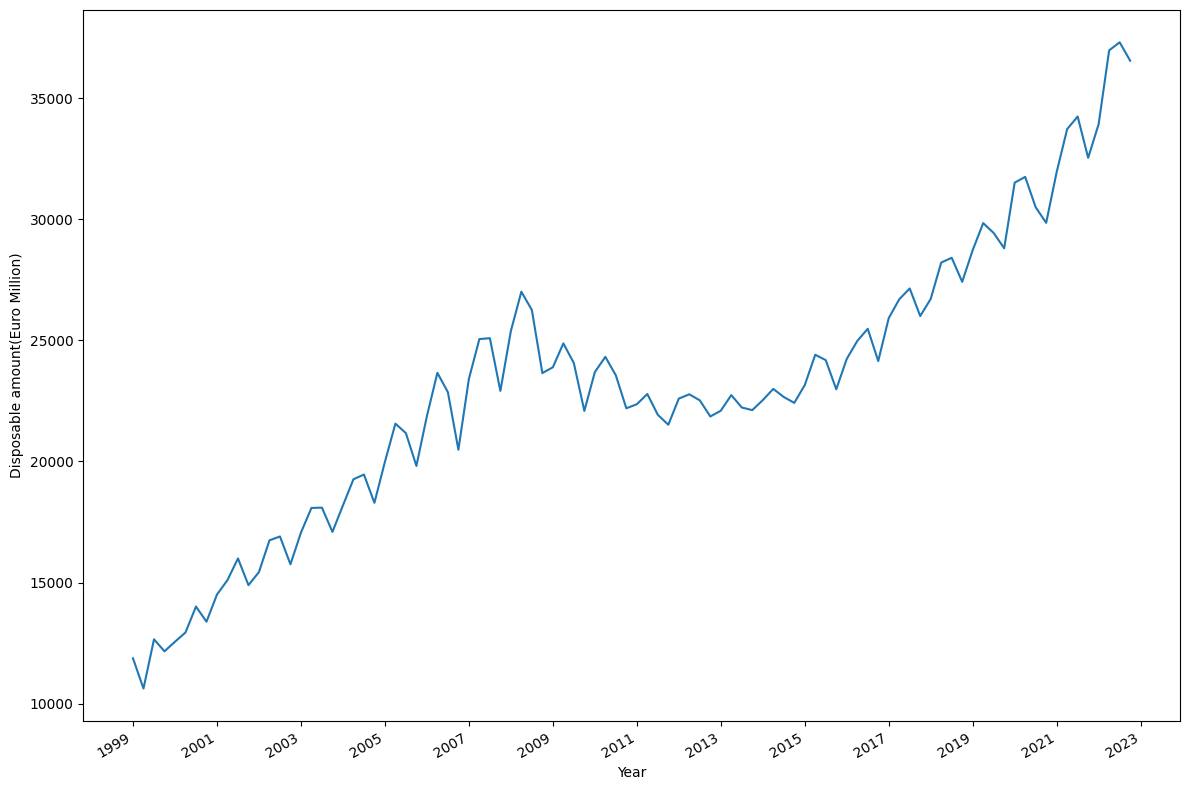

In [ ]:
# Plotting data with train/test split
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting date on x-axis and data on y-axis
ax.plot(df['TIME'],df['Value'])


# Setting x-axis label
ax.set_xlabel('Year')

# Setting y-axis label
ax.set_ylabel('Disposable amount(Euro Million)')

plt.xticks(np.arange(0, 97, 8), np.arange(1999,2024,2))

# Formatting x-axis labels
fig.autofmt_xdate()

# Adjusting layout
plt.tight_layout()

# Saving the plot to a file
plt.savefig('figures/ca_nonseasonal2_peixeiro.png', dpi=300)

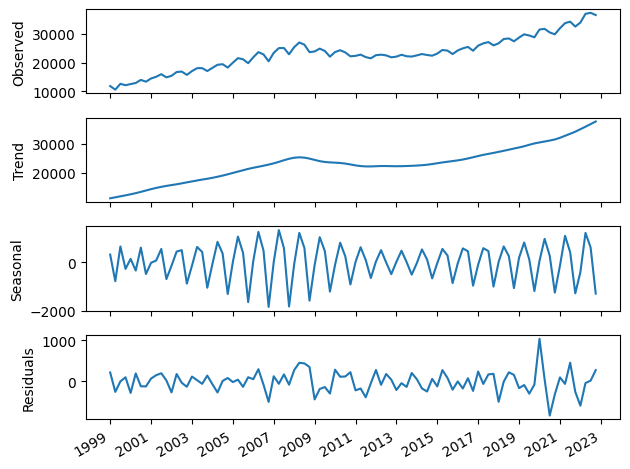

In [ ]:
advanced_decomposition = STL(df['Value'], period=4).fit()
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True)

ax1.plot(advanced_decomposition.observed)
ax1.set_ylabel('Observed')

ax2.plot(advanced_decomposition.trend)
ax2.set_ylabel('Trend')

ax3.plot(advanced_decomposition.seasonal)
ax3.set_ylabel('Seasonal')

ax4.plot(advanced_decomposition.resid)
ax4.set_ylabel('Residuals')

plt.xticks(np.arange(0, 97, 8), np.arange(1999,2024,2))

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/ca_nonseasonal1_peixeiro.png', dpi=300)

Test whether the time series is nonstationary

In [ ]:
home_ADF_result = adfuller(df['Value'])

print(f'ADF Statistic: {home_ADF_result[0]}')
print(f'p-value: {home_ADF_result[1]}')

ADF Statistic: 0.4466357894450544
p-value: 0.9831576335938321


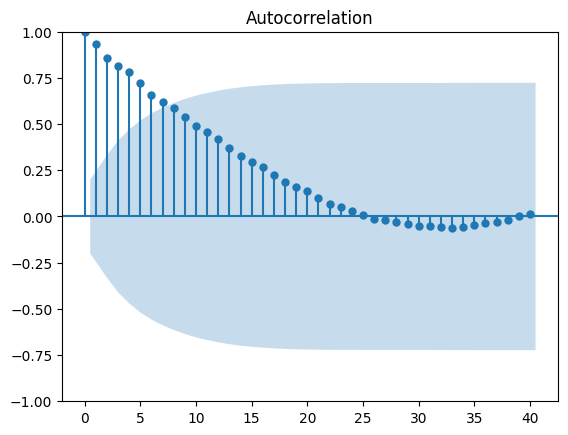

In [ ]:
plot_acf(df['Value'], lags=40);

plt.savefig('figures/CH03_F13_home_ACF.png', dpi=300)

This time series is Random Walk. so this time series is nonstationary

Test for stationarity determines the order of differencing

In [ ]:
ad_fuller_result = adfuller(df['Value'])

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: 0.4466357894450544
p-value: 0.9831576335938321


In [ ]:
eps_diff = np.diff(df['Value'], n=1)

ad_fuller_result = adfuller(eps_diff)

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -2.479530254790446
p-value: 0.1205346031115424


In [ ]:
eps_diff2 = np.diff(eps_diff, n=1)

ad_fuller_result = adfuller(eps_diff2)

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -29.2432971422125
p-value: 0.0


choose second difference

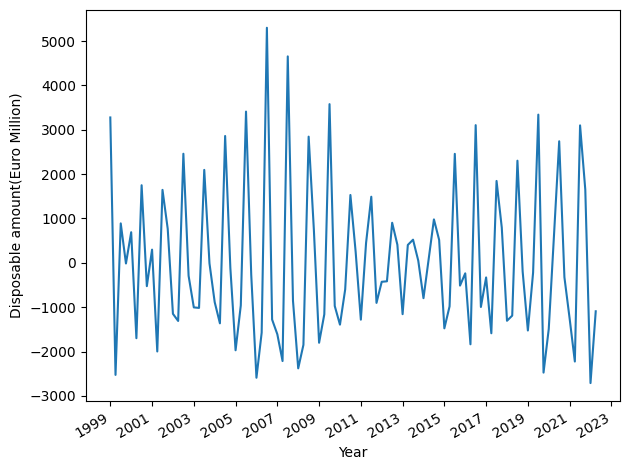

In [ ]:
fig, ax = plt.subplots()

ax.plot(df['TIME'][2:], eps_diff2)

ax.set_xlabel('Year')

ax.set_ylabel('Disposable amount(Euro Million)')

plt.xticks(np.arange(0, 97, 8), np.arange(1999,2024,2))

fig.autofmt_xdate()
plt.tight_layout()

# plt.savefig('figures/CH07_F01_peixeiro.png', dpi=300)

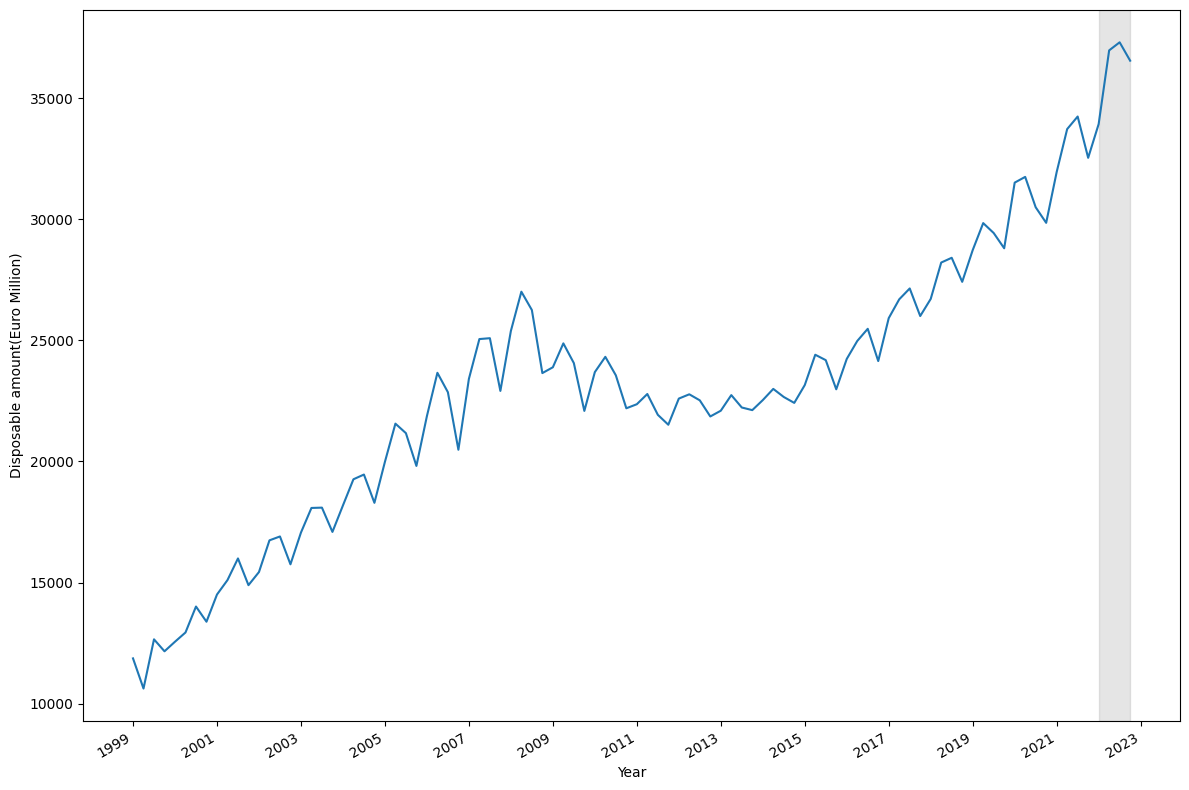

In [ ]:
# Plotting data with train/test split
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting date on x-axis and data on y-axis
ax.plot(df['TIME'],df['Value'])


# Setting x-axis label
ax.set_xlabel('Year')

# Setting y-axis label
ax.set_ylabel('Disposable amount(Euro Million)')

ax.axvspan(92, 95, color='#808080', alpha=0.2)
plt.xticks(np.arange(0, 97, 8), np.arange(1999,2024,2))

# Formatting x-axis labels
fig.autofmt_xdate()

# Adjusting layout
plt.tight_layout()

# Saving the plot to a file
plt.savefig('figures/ca_nonseasonal2_peixeiro.png', dpi=300)

Run the ARIMA function

In [ ]:
def optimize_ARIMA(training_data, order_list, d) -> pd.DataFrame:
    
    results = []
    
    for order in tqdm_notebook(order_list):
        try: 
            model = SARIMAX(training_data, order=(order[0], d, order[1]), simple_differencing=False).fit(disp=False)
        except:
            continue
            
        aic = model.aic
        bic= model.bic
        results.append([order, aic, bic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)', 'AIC','BIC']
    
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [ ]:
ps = range(0, 4, 1)
qs = range(0, 4, 1)
d = 2

order_list = list(product(ps, qs))

In [ ]:
train = df['Value'][:-4]

result_df = optimize_ARIMA(np.log(train), order_list, d)
result_df

  0%|          | 0/16 [00:00<?, ?it/s]

,"(p,q)",AIC,BIC
0,"(3, 2)",-352.510845,-337.511987
1,"(3, 1)",-351.865952,-339.366903
2,"(3, 3)",-349.360400,-331.861732
3,"(3, 0)",-348.907777,-338.908538
4,"(2, 3)",-322.034168,-307.035310
5,"(2, 2)",-305.920135,-293.421086
6,"(2, 1)",-286.773027,-276.773788
7,"(0, 3)",-283.526530,-273.527291
8,"(0, 2)",-281.481790,-273.982361
9,"(1, 2)",-259.407679,-249.408440


**Apply model** 

p = 3, q =2 , d=2

In [ ]:
model = SARIMAX(train, order=(3,2,2), simple_differencing=False)
model_fit = model.fit(disp=False)
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                   92
Model:               SARIMAX(3, 2, 2)   Log Likelihood                -728.927
Date:                Mon, 10 Apr 2023   AIC                           1469.854
Time:                        13:57:39   BIC                           1484.853
Sample:                             0   HQIC                          1475.902
                                 - 92                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8635      0.061    -14.192      0.000      -0.983      -0.744
ar.L2         -0.7866      0.043    -18.313      0.000      -0.871      -0.702
ar.L3         -0.7233      0.034    -21.462      0.0

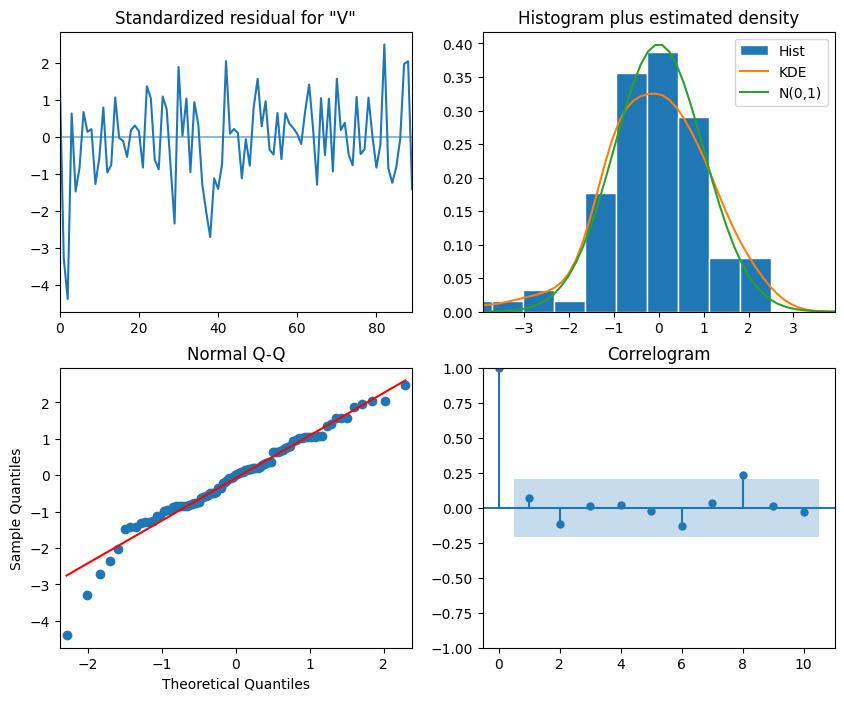

In [ ]:
model_fit.plot_diagnostics(figsize=(10,8));

plt.savefig('figures/CH07_F07_peixeiro.png', dpi=300)

historical mean

In [ ]:
historical_mean = np.mean(df['Value'])
historical_mean

23080.749166666665

In [ ]:
test = df.iloc[-4:]

test['historical_mean'] = historical_mean
test

,Statistic Label,TIME,Country,UNIT,Value,historical_mean
92,Household total disposable Income,2022Q1,Ireland,Euro Million,33931.15,23080.749167
93,Household total disposable Income,2022Q2,Ireland,Euro Million,36974.56,23080.749167
94,Household total disposable Income,2022Q3,Ireland,Euro Million,37307.67,23080.749167
95,Household total disposable Income,2022Q4,Ireland,Euro Million,36548.93,23080.749167


last year mean

In [ ]:
train = df['Value'][:-4]
last_year_mean = np.mean(train)
last_year_mean

22510.756630434782

In [ ]:
test['last_year_mean'] = last_year_mean
test

,Statistic Label,TIME,Country,UNIT,Value,historical_mean,last_year_mean
92,Household total disposable Income,2022Q1,Ireland,Euro Million,33931.15,23080.749167,22510.75663
93,Household total disposable Income,2022Q2,Ireland,Euro Million,36974.56,23080.749167,22510.75663
94,Household total disposable Income,2022Q3,Ireland,Euro Million,37307.67,23080.749167,22510.75663
95,Household total disposable Income,2022Q4,Ireland,Euro Million,36548.93,23080.749167,22510.75663


In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox


residuals = model_fit.resid


acorr_ljungbox(residuals, np.arange(1, 11, 1))


,lb_stat,lb_pvalue
1,14.116973,0.000172
2,15.803864,0.000370
3,15.809436,0.001241
4,18.963542,0.000799
5,19.123188,0.001823
6,19.402472,0.003535
7,19.481270,0.006806
8,19.938123,0.010573
9,19.938167,0.018298
10,20.001545,0.029238


In [ ]:
test['naive_seasonal'] = df['Value'].iloc[88:92].values
test

,Statistic Label,TIME,Country,UNIT,Value,historical_mean,last_year_mean,naive_seasonal
92,Household total disposable Income,2022Q1,Ireland,Euro Million,33931.15,23080.749167,22510.75663,31950.73
93,Household total disposable Income,2022Q2,Ireland,Euro Million,36974.56,23080.749167,22510.75663,33724.64
94,Household total disposable Income,2022Q3,Ireland,Euro Million,37307.67,23080.749167,22510.75663,34243.51
95,Household total disposable Income,2022Q4,Ireland,Euro Million,36548.93,23080.749167,22510.75663,32538.01


In [ ]:
ARIMA_pred = model_fit.get_prediction(92, 95).predicted_mean

test['ARIMA_pred'] = ARIMA_pred
test

,Statistic Label,TIME,Country,UNIT,Value,historical_mean,last_year_mean,naive_seasonal,ARIMA_pred
92,Household total disposable Income,2022Q1,Ireland,Euro Million,33931.15,23080.749167,22510.75663,31950.73,33794.344141
93,Household total disposable Income,2022Q2,Ireland,Euro Million,36974.56,23080.749167,22510.75663,33724.64,35415.788116
94,Household total disposable Income,2022Q3,Ireland,Euro Million,37307.67,23080.749167,22510.75663,34243.51,36001.045921
95,Household total disposable Income,2022Q4,Ireland,Euro Million,36548.93,23080.749167,22510.75663,32538.01,35051.661624


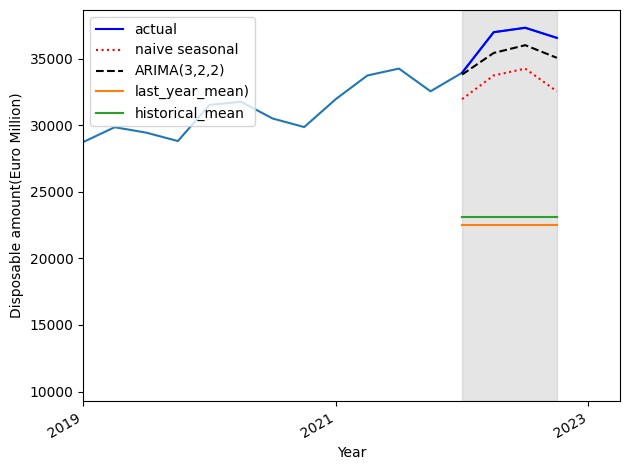

In [ ]:
fig, ax = plt.subplots()

ax.plot(df['TIME'], df['Value'])
ax.plot(test['Value'], 'b-', label='actual')
ax.plot(test['naive_seasonal'], 'r:', label='naive seasonal')
ax.plot(test['ARIMA_pred'], 'k--', label='ARIMA(3,2,2)')
ax.plot(test['last_year_mean'], label='last_year_mean)')
ax.plot(test['historical_mean'], label='historical_mean')




ax.set_xlabel('Year')
ax.set_ylabel('Disposable amount(Euro Million)')
ax.axvspan(92, 95, color='#808080', alpha=0.2)

ax.legend(loc=2)

plt.xticks(np.arange(0, 97, 8), np.arange(1999,2024,2))
ax.set_xlim(80, 97)

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH07_F08_peixeiro.png', dpi=300)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error as mape

mape_naive_seasonal = mape(test['Value'], test['naive_seasonal'])*100
mape_ARIMA = mape(test['Value'], test['ARIMA_pred'])*100
mape_last_year_mean = mape(test['Value'], test['last_year_mean'])*100
mape_historical_mean = mape(test['Value'], test['historical_mean'])*100

print('MAPE Naive:',"%.2f" % (mape_naive_seasonal),'%')
print('MAPE ARIMA:',"%.2f" % (mape_ARIMA),'%')
print('MAPE last year mean:',"%.2f" % (mape_last_year_mean),'%')
print('MAPE historical mean:',"%.2f" % (mape_historical_mean),'%')

MAPE Naive: 8.45 %
MAPE ARIMA: 3.05 %
MAPE last year mean: 37.71 %
MAPE historical mean: 36.13 %


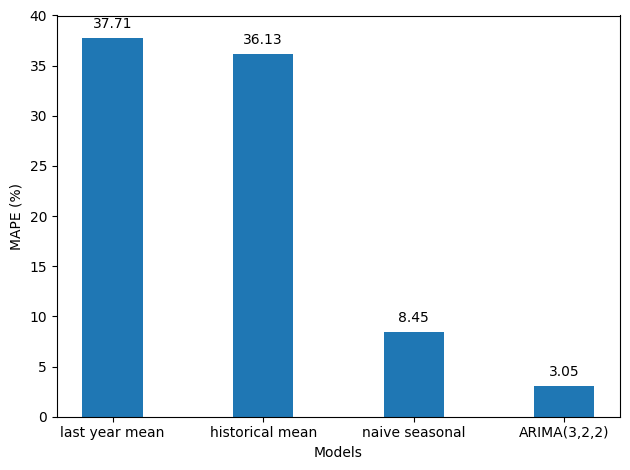

In [ ]:
fig, ax = plt.subplots()

x = ['last year mean','historical mean','naive seasonal', 'ARIMA(3,2,2)']
y = [mape_last_year_mean, mape_historical_mean, mape_naive_seasonal, mape_ARIMA]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Models')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 40)

for index, value in enumerate(y):
    plt.text(x=index, y=value + 1, s=str(round(value,2)), ha='center')

plt.tight_layout()

plt.savefig('figures/CH07_F09_peixeiro.png', dpi=300)

**conclusion：**

The Arima model using the second order difference is closer to the data of household disposable income, so we choose the Arima model

# **Report**

**Executive summary**

This executive summary provides an overview of our recently completed report on the forecast of household total disposable income in Ireland. Our team, consisting of Ke, Jack, and Grace, has analyzed the dataset spanning from 1999 to 2022, with a focus on identifying trends and model that can be used to forecast future income levels and consumer spending patterns.

Key Findings:

1.The analysis showed a clear trend of increasing household disposable income from 1999 to 2008, followed by a sharp decline due to the global financial crisis and the subsequent recession in Ireland. From 2012 onwards, a steady increase in total household disposable income was observed, indicating economic recovery.

2.The Augmented Dickey-Fuller (ADF) test results showed that the time series was non-stationary, with apvalue of 0.9831576335938321.To make the time series stationary, we applied differencing techniques. 

3.After achieving stationarity, we performed a train/test split and fitted the ARIMA model, resulting in the best-fitting model being ARIMA(3,2,2).The ARIMA(3,2,2) model had the lowest Mean Absolute Percentage Error (MAPE) of 3.05% compared to other forecasting methods, indicating its superior accuracy in predicting future household disposable income.

In conclusion, our analysis of the household total disposable income in Ireland provides valuable insights into trends and patterns that affect household income and consumer behavior. The ARIMA(3,2,2) model demonstrates the best forecasting performance for predicting future income levels and consumer spending patterns. This information can be used by policymakers and businesses to make informed decisions and develop strategies to support economic growth and household well-being.

Please find the full report attached for a more detailed analysis and discussion of our findings. 



**Full report**


The chosen non-seasonal time series analysis was household total disposable income. There are several reasons why we chose this dataset to analyse, first reason being that the total disposable household income, indicates the amount of money available for both spending and saving, is a crucial indicator of a household's economic well-being. By analysing this specific time series over time, we can gain insights into how changes in the economy, and other factors are affecting household income levels. Another reason is finding trends and patterns that can be utilized to forecast future income levels and consumer spending patterns is another reason to evaluate the total household discretionary income time series. By using specific statistical models such the Arima model, we can now identify trends, seasonality, and other patterns that can help inform forecasts and predictions about the future.

Our main objective is to investigate trends and patterns in household income and consumer spending behaviours across Ireland across different years, we can learn more about the variables that affect household income and consumer behaviours by examining this kind of data. Our source for Irelands total disposable household income came from www.data.cso.ie. From this site, we were able to obtain the total disposable income in Ireland from 1999 to 2022, this period was perfect as clear trends and patterns can be seen here in the 23 year period which was collected quarterly. In figure 1.0 below, we can see a graph is displayed showing the time series analysis of the data we have been given in the dataset.


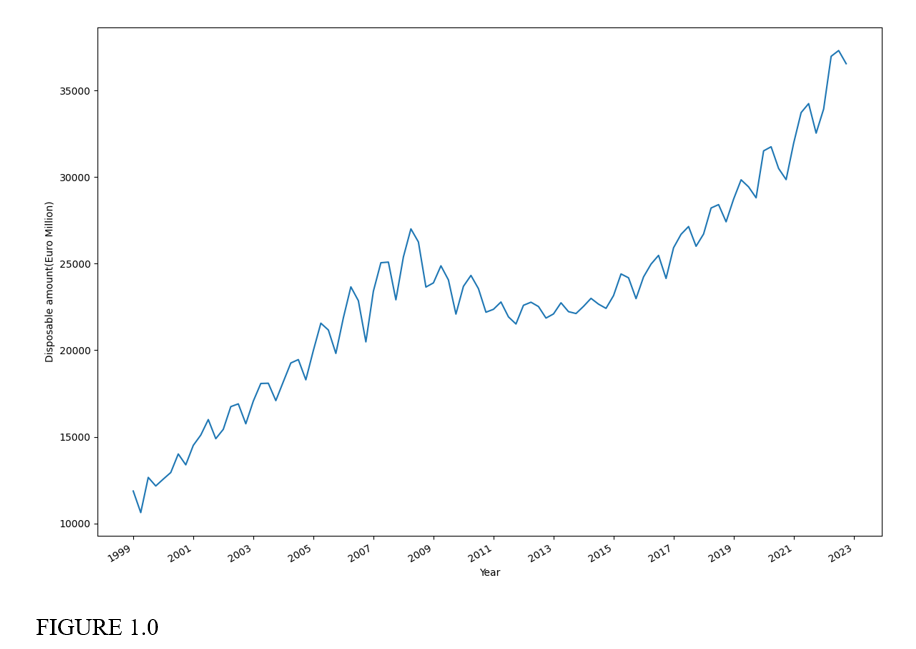

In the above graph in figure 1.0, according to the increased trend in total household disposable income from 1999 to 2008, there may have been an increase in household income as a whole during that time. However, the global financial crisis that took place between 2008 and 2012/13, since this dataset is based in Ireland, we can assume this is due to the recession Ireland had in 2008, The Irish economy entered severe recession in 2008, and then entered into an economic depression in 2009, this had a massive effect on families disposable income in Ireland. Many households saw their household income decline as a result of the recession. Ireland's unemployment rates spiked, and many people as well as families lost their jobs resulting in debt. Thankfully, Ireland has since recovered from the recession and has been growing economically ever since, the slow and steady increase in total household disposable income from 2012 onwards suggests that the economy was recovering from the financial crisis and may be associated with factors such as economic growth, low unemployment rates, and inflation. 

To better understand the trends and patterns in the time series data, it was separated into different components such as observed, trend, seasonal and residuals, this allows us to help  identify factors that are driving changes in the variable over time and to make more accurate forecasts about future values of the variable.

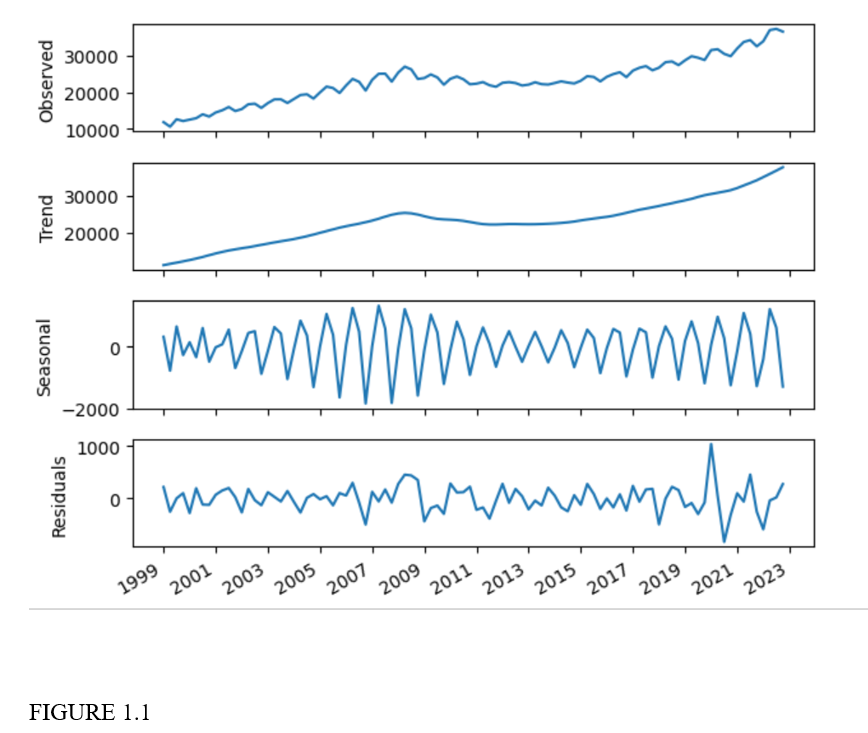

The observed component of a time series represents the actual values of the variable being measured over time. The trend component of a time series represents the long-term movement of the variable over time. This component can be used to identify whether the variable is increasing, decreasing, or staying the same over time. The seasonal component of a time series represents the regular, repeating patterns of the variable over time. Making predictions and spotting patterns can both benefit from an understanding of a time series' seasonal component. The random variations in the data that the trend cannot account for are represented by the residual component of a time series.

With all the data we’ve obtained so far, a test was made to see if the data was stationary or non-stationary. Since many time series models assume that the data is stationary, testing for stationarity is an essential step in time series analysis. The mean and variance of stationary time series remain constant over time, and the autocorrelation structure is independent of time. To evaluate whether our times series is non-stationary, we applied the Augmented Dickey-Fuller (ADF ) tests. The series' non-stationarity is the ADF test's null hypothesis. The null hypothesis is rejected, and the series is regarded as stationary if the test's p-value is less than the 0.05 significance level. After testing, the results showed that  p-value is 0.9831576335938321 which concludes our time series in non-stationary.


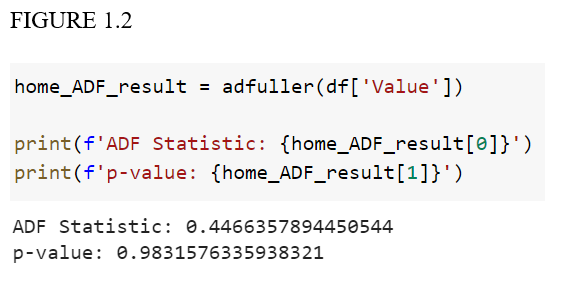

Next, we assessed the ACF to see the correlation. The autocorrelation function (ACF) is an analytical tool for measuring the level of correlation between a time series and its lagged values. The ACF can help to identify the presence of patterns or trends in the time series data, such as periodicity or seasonality.

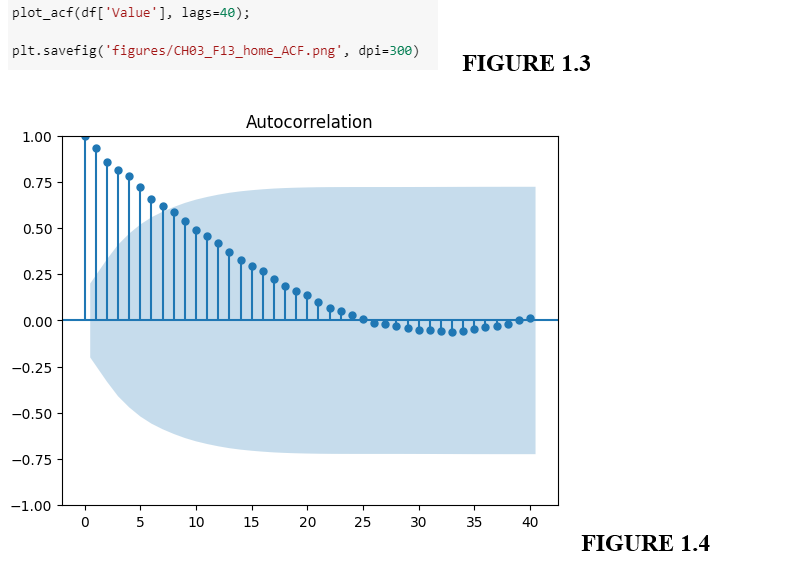

From FIGURE 1.4 above, we can determine the time series is random walk which means the time series is non-stationary. A random walk is a process in which there is an equal chance of going up or down by a random number.

Since our time series is non-stationary, we need to change it to stationary, this is important as converting a non-stationary time series into a stationary can help to avoid these issues and provide more accurate and reliable forecasts. This is typically achieved by using techniques such as differencing. Differentiating takes the difference between two observations in the time series. The time series that results may be stagnant because the trend and seasonality components have been eliminated.


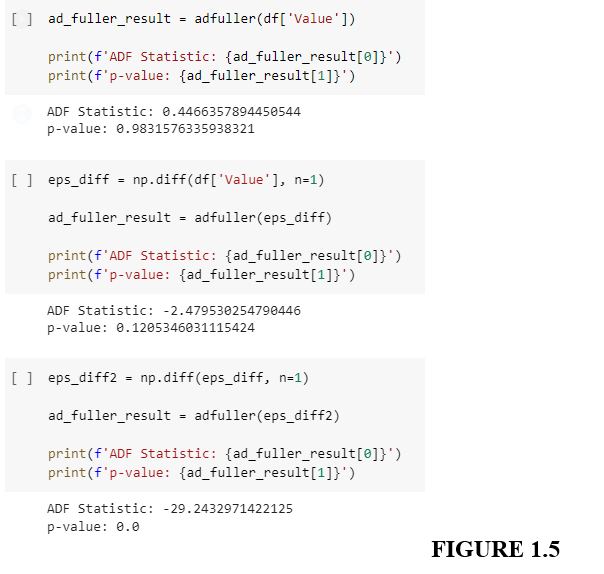

Second differencing is a technique used to make a time series stationary by taking the difference between consecutive observations twice. It is a form of differencing that is used when the first difference of the time series is still non-stationary.

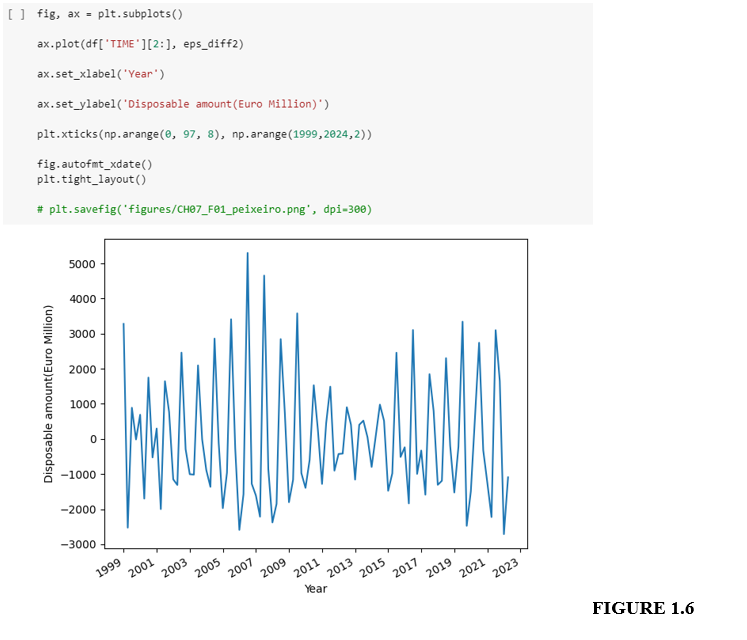

Now that the data is stationary, we now apply the train/test split. The idea is to split the available data into two sections: training  and testing. The testing set is used to assess the model's performance, whereas the training set is used to fit the model. A train/test split allows us to assess the model's performance on data that it has never seen before, giving us a more precise prediction of how the model will perform going forward.

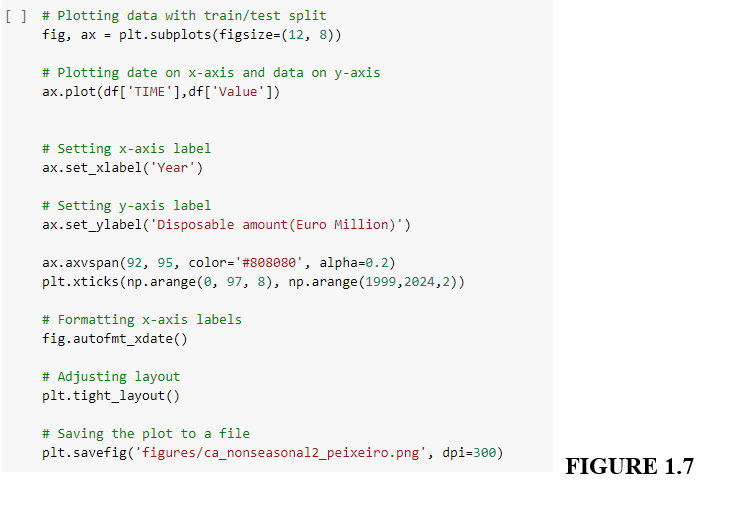

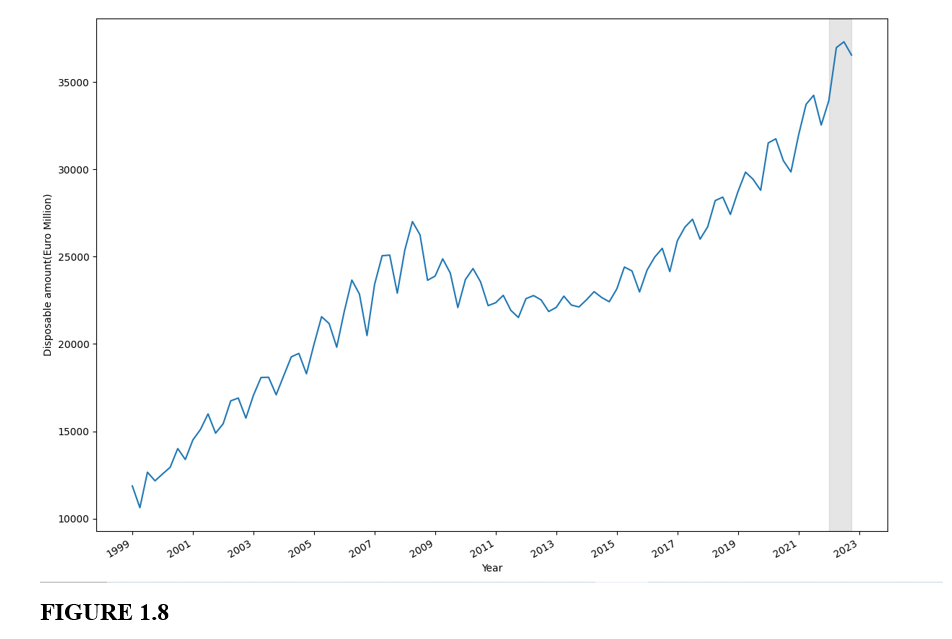

Now we fit the Arima function to the time series, this is a popular tool for capturing complicated patterns in time series data is the ARIMA (Autoregressive Integrated Moving Average) function, which combines moving average, differencing, and autoregressive methods. We use AIC(Akaike Information Criterion), BIC(Bayesian Information Criterion), and (p,q) to do this.

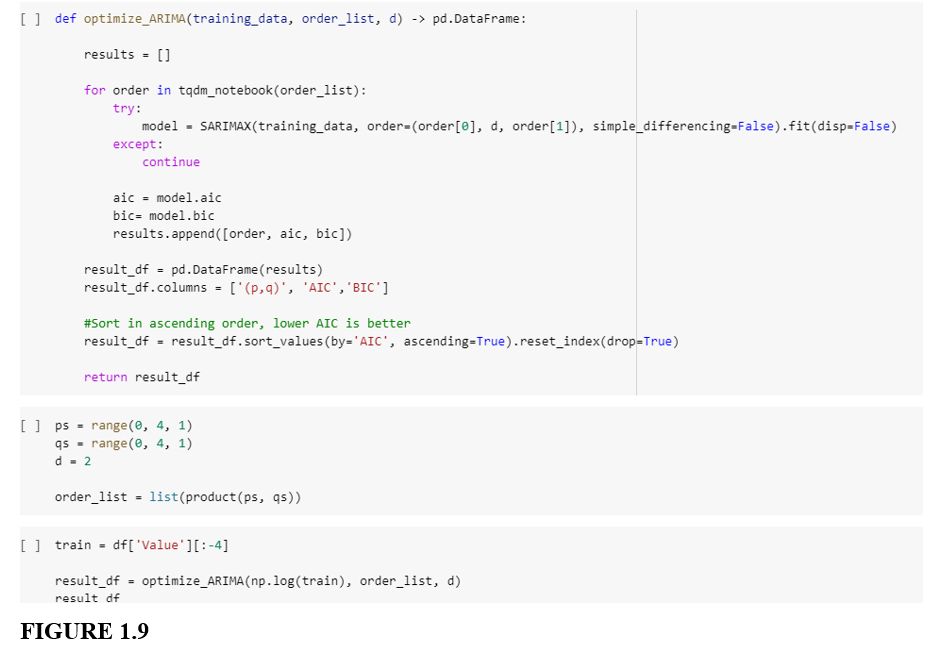

Our results are shown in figure 2.0 below,

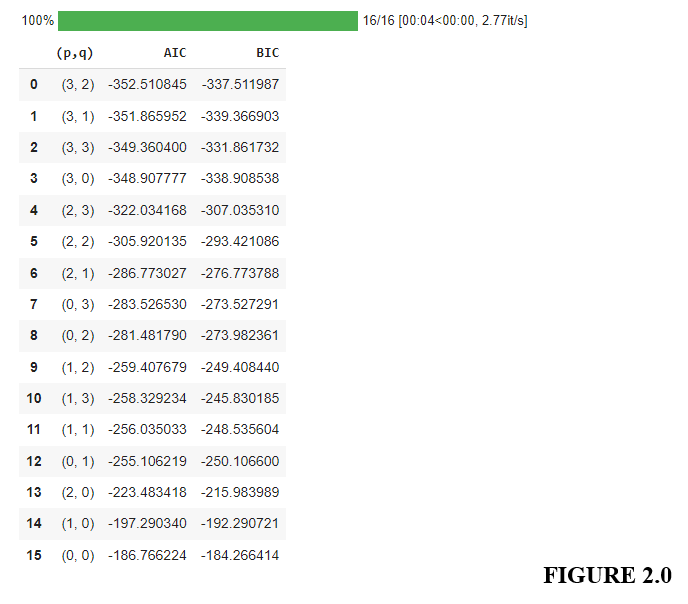

We now apply the model, which is shown in figure 2.1 below,

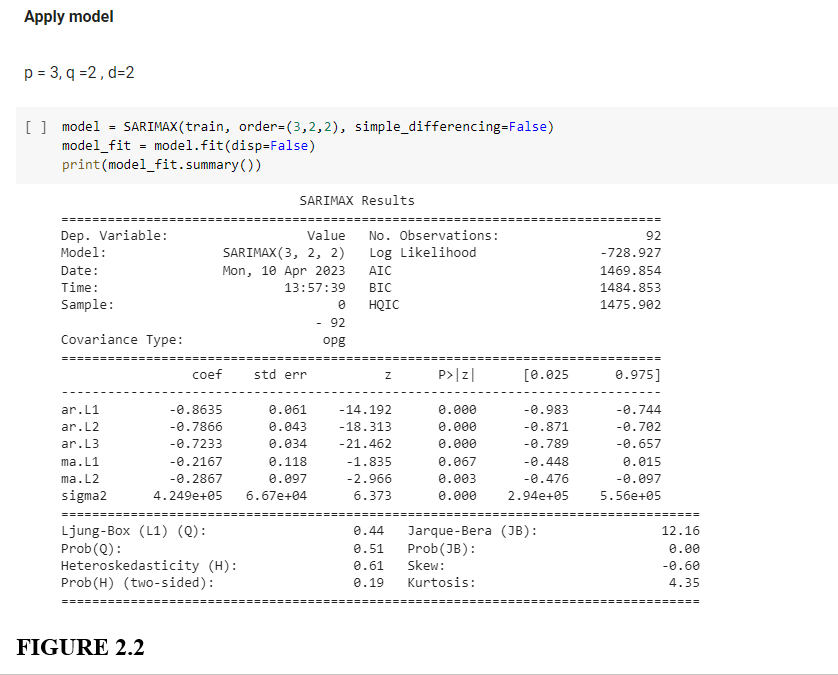

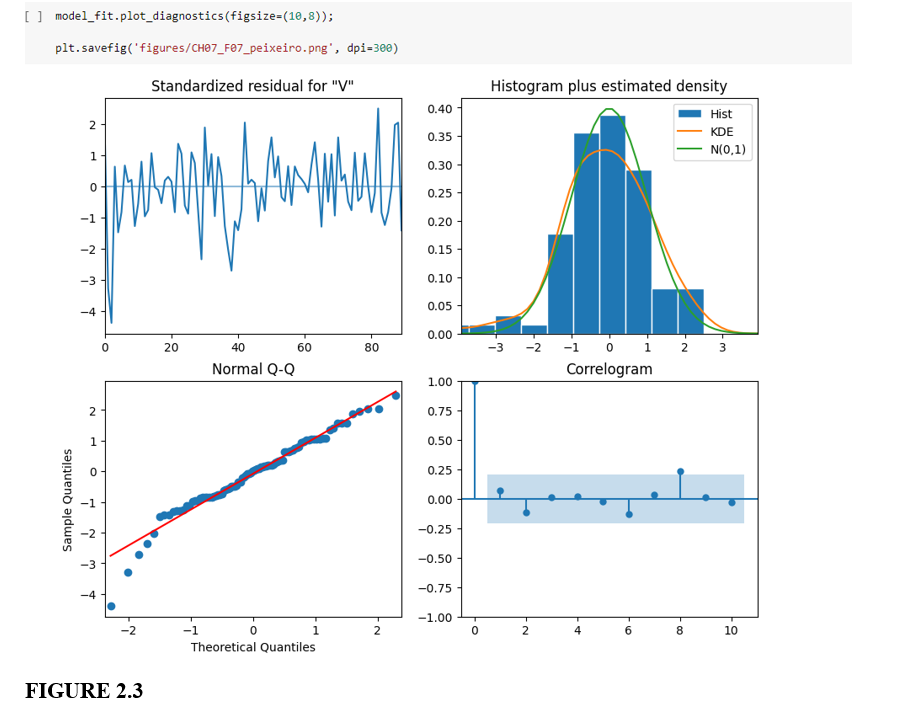

In figure 2.3 above, looking at the normal Q-Q graph, we can conclude that data is normally distributed and good. A Q-Q plot (quantile-quantile plot) is used to visually assess whether a dataset follows a certain distribution.

The historical mean and last year mean is now calculated and displayed on the table, A wide picture of the time series over a lengthy period of time is provided by the historical mean. On the other hand, the time series' most recent changes are captured by the last year's mean.



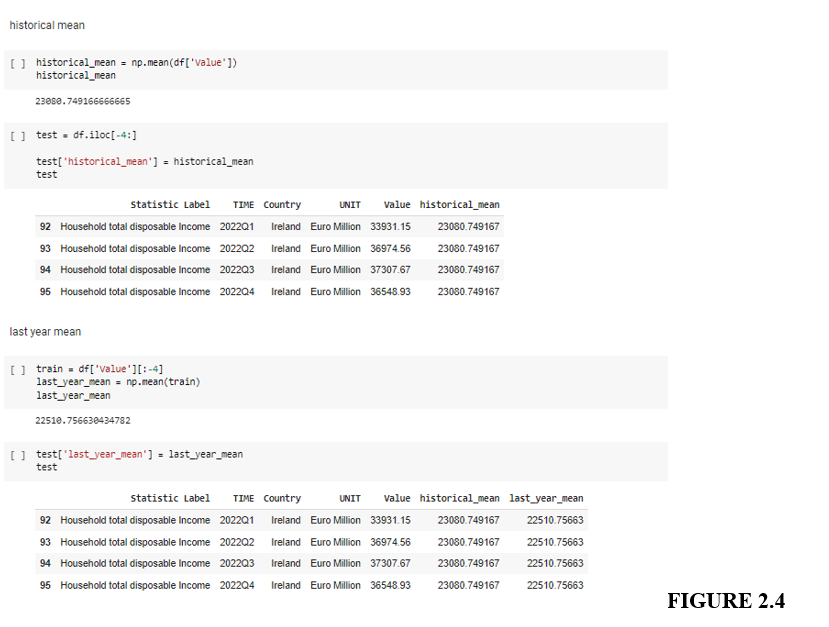

We also implement the naïve seasonal and arima_pred function, Naive seasonal forecasting is a forecasting technique that assumes that a time series' future values would be identical to their corresponding values from the preceding year, while arima_pred can be used to generate forecasts or predictions for future time periods.


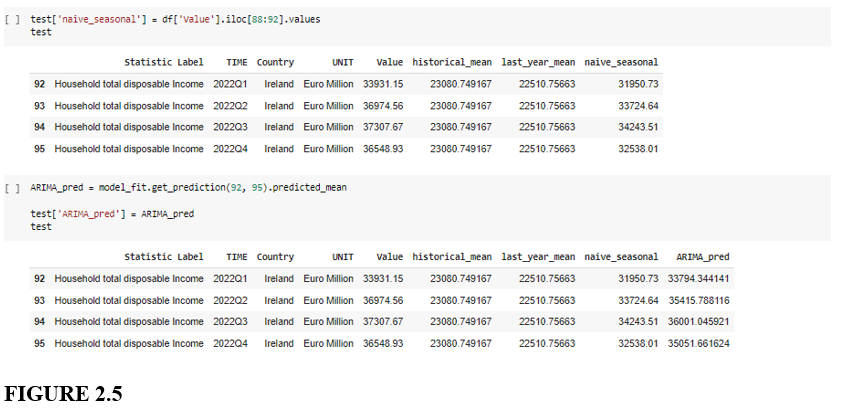


All the data is then put the same graph including, actual, naïve seasonal, Arima pred, historical mean and last year mean.

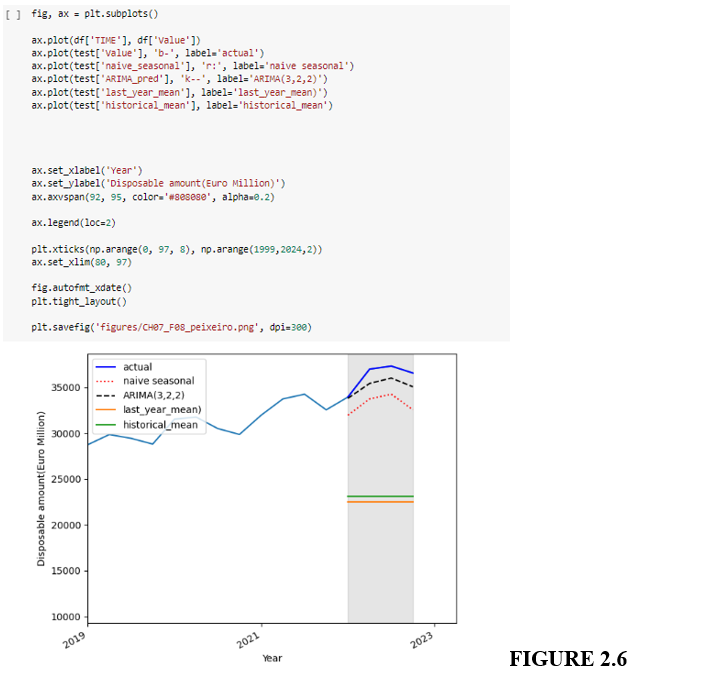

To determine the best fitted model, we can see ARIMA(3,2,2) is the best suited model as it has the lowest MAPE percentage with 3.05% while naïve seasonal has 8.45%, historical mean has 36.13% and last year mean stands at 37.71. MAPE stands for Mean Absolute Percentage Error, which is a metric used to evaluate the accuracy of a forecasting model. It measures the average percentage difference between the actual values and the forecasted values.

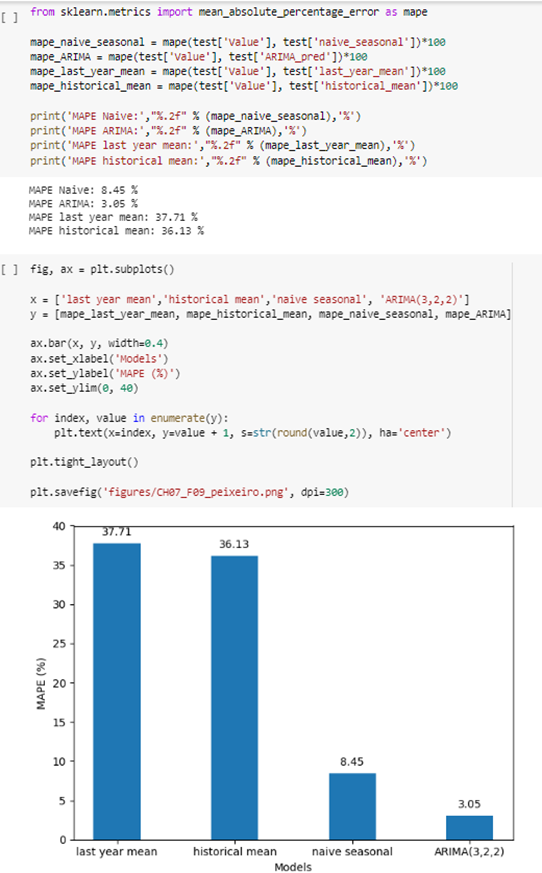